In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
heart = pd.read_csv('dataset/heart.csv')

In [39]:
heart.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [41]:
heart.shape

(303, 14)

In [43]:
heart[heart.duplicated()]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [45]:
heart.iloc[160:171]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
160,56,1,1,120,240,0,1,169,0,0.0,0,0,2,1
161,55,0,1,132,342,0,1,166,0,1.2,2,0,2,1
162,41,1,1,120,157,0,1,182,0,0.0,2,0,2,1
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
165,67,1,0,160,286,0,0,108,1,1.5,1,3,2,0
166,67,1,0,120,229,0,0,129,1,2.6,1,2,3,0
167,62,0,0,140,268,0,0,160,0,3.6,0,2,2,0
168,63,1,0,130,254,0,0,147,0,1.4,1,1,3,0
169,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0


In [54]:
heart.drop_duplicates(subset=['age','sex','trtbps','chol'], keep='first', inplace=True)

In [56]:
heart.shape

(302, 14)

In [60]:
heart.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'cp'}>,
        <Axes: title={'center': 'trtbps'}>],
       [<Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'fbs'}>,
        <Axes: title={'center': 'restecg'}>,
        <Axes: title={'center': 'thalachh'}>],
       [<Axes: title={'center': 'exng'}>,
        <Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'slp'}>, <Axes: title={'center': 'caa'}>],
       [<Axes: title={'center': 'thall'}>,
        <Axes: title={'center': 'output'}>, <Axes: >, <Axes: >]],
      dtype=object)

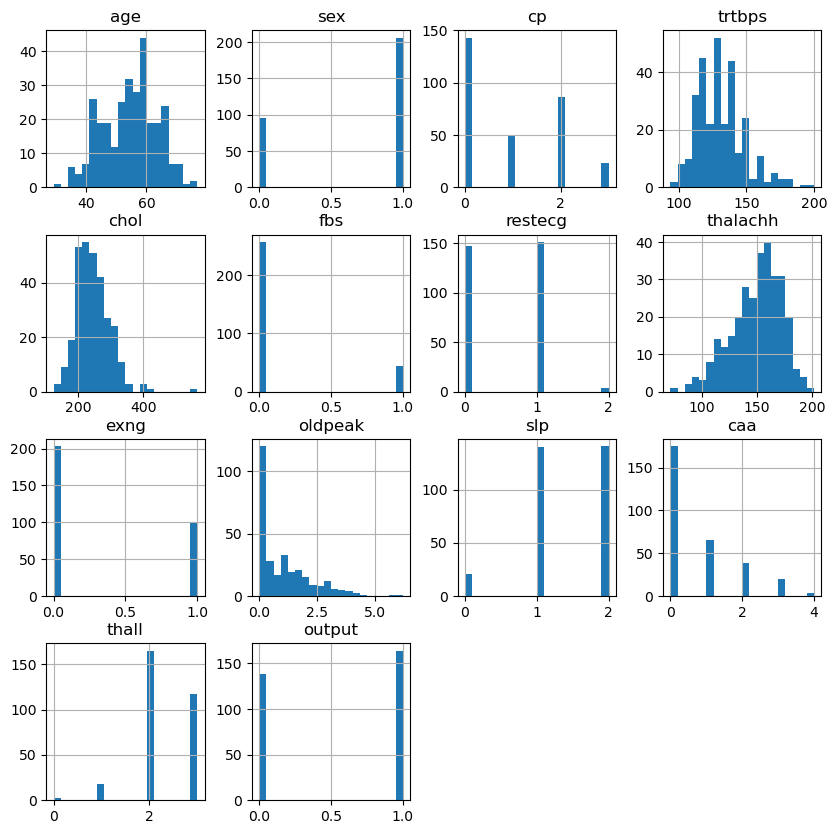

In [66]:
heart.hist(bins=20, figsize=(10,10))

In [68]:
heart_corr=heart.corr()

In [70]:
heart_corr['output'].sort_values(ascending=False)

output      1.000000
cp          0.432080
thalachh    0.419955
slp         0.343940
restecg     0.134874
fbs        -0.026826
chol       -0.081437
trtbps     -0.146269
age        -0.221476
sex        -0.283609
thall      -0.343101
caa        -0.408992
oldpeak    -0.429146
exng       -0.435601
Name: output, dtype: float64

In [90]:
!pip install xgboost

   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.1/124.9 MB 2.4 MB/s eta 0:00:53
   ---------------------------------------- 0.8/124.9 MB 8.4 MB/s eta 0:00:15
    --------------------------------------- 1.6/124.9 MB 11.7 MB/s eta 0:00:11
    --------------------------------------- 2.9/124.9 MB 15.4 MB/s eta 0:00:08
   - -------------------------------------- 3.7/124.9 MB 15.6 MB/s eta 0:00:08
   - -------------------------------------- 4.7/124.9 MB 16.6 MB/s eta 0:00:08
   - -------------------------------------- 5.6/124.9 MB 17.0 MB/s eta 0:00:08
   -- ------------------------------------- 6.7/124.9 MB 17.8 MB/s eta 0:00:07
   -- ------------------------------------- 7.8/124.9 MB 18.4 MB/s eta 0:00:07
   -- ------------------------------------- 9.0/124.9 MB 19.3 MB/s eta 0:00:07
   --- ------------------------------------ 10.1/124.9 MB 19.0 MB/s et

In [95]:
import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

In [107]:
from sklearn.preprocessing import StandardScaler
X = heart.iloc[:, 1:-1].values
y = heart.iloc[:, -1].values
scaler = StandardScaler()
scaler.fit(X)


StandardScaler()

In [88]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2,
 random_state= 42, stratify=y)


In [99]:
model = GaussianNB()
model.fit(X_train, y_train)
predicted = model.predict(X_test)

print("The f1 score of Gaussian Naive Bayes model is : ", f1_score(y_test, predicted))

The f1 score of Gaussian Naive Bayes model is :  0.8450704225352113


In [103]:
model2=BernoulliNB()
model2.fit(X_train,y_train)
predicted2=model2.predict(X_test)
print("The f1 score of Bernoulli Naive Bayes model is : ", f1_score(y_test, predicted2))

The f1 score of Bernoulli Naive Bayes model is :  0.7941176470588235


In [115]:
model3 = KNeighborsClassifier(n_neighbors = 1)
model3.fit(scaler.transform(X_train), y_train)
predicted3 = model3.predict(scaler.transform(X_test))

print("The f1 score of KNN is : ", f1_score(y_test, predicted3.round()))

The f1 score of KNN is :  0.7714285714285715


In [117]:
model4=RandomForestClassifier(n_estimators=100, random_state=42)
model4.fit(X_train,y_train)
predicted4=model4.predict(X_test)
print("The f1 score of Random Forest is : ", f1_score(y_test, predicted4))

The f1 score of Random Forest is :  0.8611111111111112


In [119]:
model5=xgb.XGBClassifier()
model5.fit(X_train,y_train)
predicted5=model5.predict(X_test)
print("The f1 score of Random Forest is : ", f1_score(y_test, predicted5))

The f1 score of Random Forest is :  0.8055555555555556


In [121]:
from sklearn.model_selection import cross_val_score


In [123]:
model = GaussianNB()
scores = cross_val_score(model, X, y, cv=10, scoring="f1")
print("%0.4f f1 with a standard deviation of %0.2f" % (scores.mean(),
 scores.std()))

0.8429 f1 with a standard deviation of 0.06


In [125]:
model = BernoulliNB()
scores = cross_val_score(model, X, y, cv=10, scoring="f1")
print("%0.4f f1 with a standard deviation of %0.2f" % (scores.mean(),
 scores.std()))

0.8345 f1 with a standard deviation of 0.04


In [127]:
model = KNeighborsClassifier(n_neighbors = 1)
scores = cross_val_score(model, scaler.transform(X), y, cv=10, scoring="f1")
print("%0.4f f1 with a standard deviation of %0.2f" % (scores.mean(),
 scores.std()))

0.7795 f1 with a standard deviation of 0.07


In [129]:
model = xgb.XGBClassifier()
scores = cross_val_score(model, X, y, cv=10, scoring="f1")
print("%0.4f f1 with a standard deviation of %0.2f" % (scores.mean(),
 scores.std()))

0.8130 f1 with a standard deviation of 0.07


In [131]:
model = RandomForestClassifier()
scores = cross_val_score(model, X, y, cv=10, scoring="f1")
print("%0.4f f1 with a standard deviation of %0.2f" % (scores.mean(),
 scores.std()))

0.8517 f1 with a standard deviation of 0.04


In [133]:
# best performing models are randomforest, bernoulli and gaussian

In [181]:
from sklearn.model_selection import GridSearchCV
nb_classifier = GaussianNB()
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
gs_NB = GridSearchCV(estimator=nb_classifier,
 param_grid=params_NB,
 cv=5, # use any cross validation technique
 verbose=1,
 scoring='f1')
gs_NB.fit(X_train, y_train)
# gs_NB.best_params_['var_smoothing']


Fitting 5 folds for each of 100 candidates, totalling 500 fits


GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.84803587e-02, 2.31...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             scoring='f1', verbose=1)

In [179]:
model = GaussianNB(var_smoothing= gs_NB.best_params_['var_smoothing'])
scores = cross_val_score(model, X, y, cv=10, scoring="f1")
print("%0.4f f1 with a standard deviation of %0.2f" % (scores.mean(),
 scores.std()))

0.8587 f1 with a standard deviation of 0.07


In [169]:
bnb_classifier = BernoulliNB()
params_BNB = {'alpha': np.linspace(1/1000000, 20.0, 400)}
gs_BNB = GridSearchCV(estimator=bnb_classifier,
 param_grid=params_BNB,
 cv=5, # use any cross validation technique
 verbose=1,
 scoring='f1')
gs_BNB.fit(X_train, y_train)
# gs_BNB.best_params_['alpha']


Fitting 5 folds for each of 400 candidates, totalling 2000 fits


GridSearchCV(cv=5, estimator=BernoulliNB(),
             param_grid={'alpha': array([1.00000000e-06, 5.01263108e-02, 1.00251622e-01, 1.50376932e-01,
       2.00502243e-01, 2.50627554e-01, 3.00752865e-01, 3.50878175e-01,
       4.01003486e-01, 4.51128797e-01, 5.01254108e-01, 5.51379419e-01,
       6.01504729e-01, 6.51630040e-01, 7.01755351e-01, 7.51880662e-01,
       8.02005972e-01, 8.52131283e-01, 9.02256594e...
       1.88471179e+01, 1.88972432e+01, 1.89473685e+01, 1.89974938e+01,
       1.90476191e+01, 1.90977444e+01, 1.91478697e+01, 1.91979950e+01,
       1.92481203e+01, 1.92982456e+01, 1.93483710e+01, 1.93984963e+01,
       1.94486216e+01, 1.94987469e+01, 1.95488722e+01, 1.95989975e+01,
       1.96491228e+01, 1.96992481e+01, 1.97493734e+01, 1.97994988e+01,
       1.98496241e+01, 1.98997494e+01, 1.99498747e+01, 2.00000000e+01])},
             scoring='f1', verbose=1)

In [191]:
model = BernoulliNB(alpha=gs_BNB.best_params_['alpha'])
scores = cross_val_score(model, X, y, cv=10, scoring="f1")
print("%0.4f f1 with a standard deviation of %0.2f" % (scores.mean(),
 scores.std()))

0.8377 f1 with a standard deviation of 0.04


In [201]:
rf_classifier = RandomForestClassifier()

params_RF= {
 'n_estimators': [100, 200, 300],
 'criterion': ['gini', 'entropy'],
 'max_depth': [None, 12, 10, 8],
 'min_samples_split': [2, 5],
 'min_samples_leaf': [1, 2, 4],
 'max_features': ['sqrt', 'log2']
}
gs_RF = GridSearchCV(estimator=rf_classifier,
 param_grid=params_RF,
 cv=5, # use any cross validation technique
 verbose=1,
 scoring='f1')
gs_RF.fit(X_train, y_train)
gs_RF.best_params_


Fitting 5 folds for each of 288 candidates, totalling 1440 fits


{'criterion': 'gini',
 'max_depth': None,
 'max_features': 'log2',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 100}

In [208]:
model=RandomForestClassifier()
scores = cross_val_score(model, X, y, cv=10, scoring="f1")
print("%0.4f f1 with a standard deviation of %0.2f" % (scores.mean(),
 scores.std()))

0.8701 f1 with a standard deviation of 0.04


In [218]:
knn_classifier = KNeighborsClassifier()
params_KNN = {
 'n_neighbors': [1, 2, 3, 4, 5],
 'p': [1, 2, 3]
}
gs_knn = GridSearchCV(estimator=knn_classifier,
 param_grid=params_KNN,
 cv=5, # use any cross validation technique
 verbose=1,
 scoring='f1')
gs_knn.fit(X_train, y_train)
gs_knn.best_params_


Fitting 5 folds for each of 15 candidates, totalling 75 fits


{'n_neighbors': 3, 'p': 1}

In [214]:
model=KNeighborsClassifier(n_neighbors=3,p=1)
scores = cross_val_score(model, X, y, cv=10, scoring="f1")
print("%0.4f f1 with a standard deviation of %0.2f" % (scores.mean(),
 scores.std()))

0.6911 f1 with a standard deviation of 0.13


In [220]:
xg_classifier = xgb.XGBClassifier()
params_XG = {
 'max_depth': [2, 3, 4, 5],
 'learning_rate': [0.2, 0.1, 0.01],
 'subsample': [0.1, 0.2, 0.5, 0.7]
}
gs_xg = GridSearchCV(estimator=xg_classifier,
 param_grid=params_XG,
 cv=5, # use any cross validation technique
 verbose=1,
 scoring='f1')
gs_xg.fit(X_train, y_train)
gs_xg.best_params_

Fitting 5 folds for each of 48 candidates, totalling 240 fits


{'learning_rate': 0.01, 'max_depth': 4, 'subsample': 0.2}

In [232]:
model=xgb.XGBClassifier(learning_rate=0.01, max_depth=4, subsample=0.2)
scores = cross_val_score(model, X, y, cv=10, scoring="f1")
print("%0.4f f1 with a standard deviation of %0.2f" % (scores.mean(),
 scores.std()))

0.8586 f1 with a standard deviation of 0.05
